<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Bhav_Intro_NNs_Sprint_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**

#####Neuron:  It is the basic unit of a neural network. It receives an input, applies, weights and biases to them and then applies an activation function before passing to the next layer.

#####Input Layer: The initial data for the neural network (from a dataframe, array, a csv file or web network) is processed by this layer. Each layer has a number of units or nodes. Traditionally, no. of neurons in input layer = no. of training data features + 1. The input layer receives the data. Each input has an associated weight that is assigned based on its relative importance to other inputs. The extra node is the calculate the bias term. The bias (offset) makes sure that even when all the inputs are none (all 0s, there is going to be an activation in the neuron). The bias in coordination with weights gives the NN the full range of motion it needs to find the best fit to the data.

#####Hidden Layer:The neurons in the hidden layer calculate the weighted sum of inputs and weights, add the bias and execute an activation function before passing the ouput to the next layer. Usually, each hidden layer has same number of neurons. The optimal no. of neurons in hidden layer = (Trading data sample)/(Factor*(Input neurons+Output neurons)). The factor is used to prevent over-fitting and is usually between 1-10. One hidden layer is usually sufficient for the majority of problems.

#####Output Layer: The output or the final layer receives the input from the hidden layers. The number of neurons in the output layer is one (for both regression and binary classification problems). For multiclass classification problems, the output layer has one neuron per class label in the model.

#####Activation Function: They are used to introduce non-linearity to neural networks. It squashes the values in a smaller range, e.g. sigmid function squashes the values between a range of 0 to 1. Activation functions like ReLU, LeakyReLU, SeLU are preferred over sigmid activation function.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

The input layer of the neural network assigns weights randomly when it receives the data and passes the product to the the next layer. Since the weights are assigned randomly, the first pass through the network could have a significant prediction error. Backpropogation uses algorithms which adjusts the weights by checking the difference between the prediction and the actual results in an effort to minimize the error. 

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

inputs received by input layer is multipled by weights assigned, bias is added and passed to the neurons in the ouput layer. Bias + Sum of (products of weight assigned for each input layer neuron*input data for each input layer neuron) = predicted output

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [0]:
import tensorflow

from tensorflow import keras


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
model1 = Sequential([
    Dense(1, activation='sigmoid'),
    Dense(1, activation="sigmoid") #use one neuron in output layer as binary classification and use sigmoid for backpropagation.
])

In [0]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
stop = EarlyStopping(monitor="accuracy", patience = 3, min_delta=0.0001)

In [7]:
h1 = model1.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.4733
Epoch 2/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.4733
Epoch 3/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.4733
Epoch 4/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7141 - accuracy: 0.4733
Epoch 5/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7139 - accuracy: 0.4733
Epoch 6/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.4733
Epoch 7/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.4733
Epoch 8/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.4767
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.4733
Epoch 10/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.7058 - accuracy: 0.4667

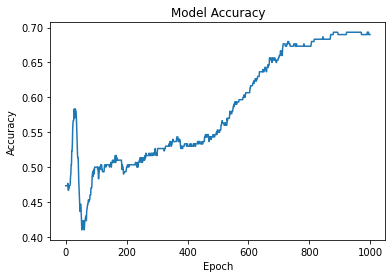

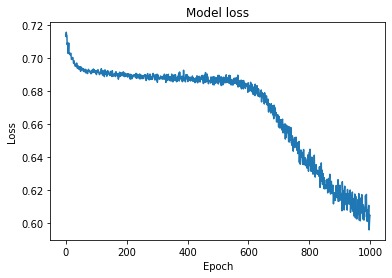

In [17]:
import matplotlib.pyplot as plt

#Plot accuracy
plt.plot(h1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot loss
plt.plot(h1.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [0]:
model2 = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation="sigmoid") 
])

In [0]:
stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=3, min_delta=0.01)

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
h2 = model2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6300
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6800
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.7267
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.8167
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.8633
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.8833
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.8900
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.9067
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.9167
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.9300
Epoch 11/

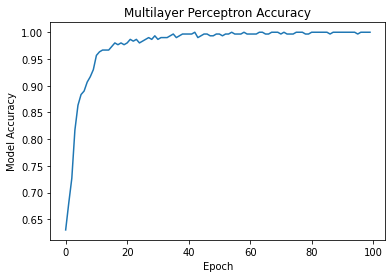

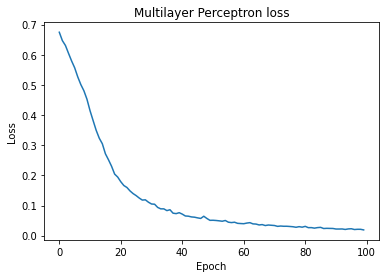

In [63]:
import matplotlib.pyplot as plt

#Plot accuracy
plt.plot(h2.history['accuracy'])
plt.title('Multilayer Perceptron Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot loss
plt.plot(h2.history['loss'])
plt.title('Multilayer Perceptron loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [0]:
pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


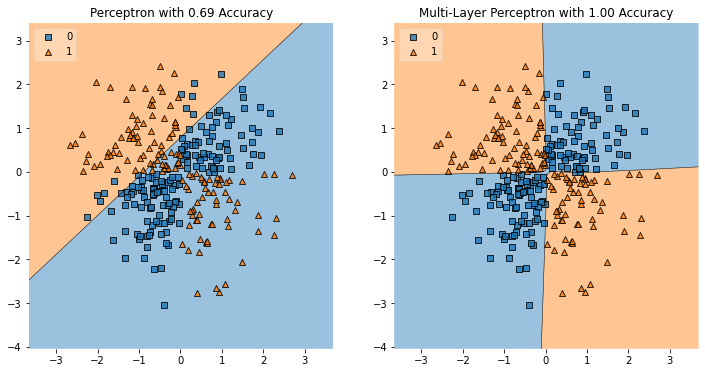

In [65]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

Ans. - Adding more layers will allow better division of decision boundaries for a dataset which has non-linear separation boundaries. If the separation boundary is linear, usually, no hidden layers are needed. Images are processed by computers as a separate matrix for each pixel, so the data is distributed in a non-linear fashion when we are trying to distinguish between two different images. Adding hidden layers can allow better division of decision boundaries for images.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [126]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
df['target'].nunique() #binary classification problem

2

In [128]:
df.isnull().sum()

#No missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [129]:
df.dtypes #datatypes are in numerical form, so don't need encoding

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [130]:
#Split into train and validation datasets

from sklearn.model_selection import train_test_split
train, val = train_test_split(df, train_size=0.80, test_size=0.20, stratify=df['target'], random_state=42)
train.shape, val.shape

((242, 14), (61, 14))

In [131]:
train['target'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [132]:
val['target'].value_counts(normalize=True)

1    0.540984
0    0.459016
Name: target, dtype: float64

In [0]:
#Thus, the train and validation datasets have equal distribution of the target

Baseline accuracy with no features

In [133]:
# Train dataset baseline
target = 'target'
y_train = train[target]
y_train.value_counts(normalize=True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [135]:
#baseline accuracy if we guessed the majority class for every prediction on train dataset

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)



0.5454545454545454

Baseline accuracy with no features = 54.54%

Fitting a Keras MLP Neural Network Model

In [0]:
#Arrange X feature matrices and y target vectors
target = 'target'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [137]:
X_train.shape

(242, 13)

In [0]:
#Standardize the data 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform scaler on data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [0]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.callbacks import EarlyStopping

MLP model with no hyperparameter tuning

In [140]:
inputs = X_train_scaled.shape[1]
inputs

13

In [0]:
model = Sequential()

model.add(Dense(32, input_shape=(inputs,))) #input layer #13 inputs 
model.add(tensorflow.keras.layers.PReLU()) #PRelu activation, better than ReLu
#model.add(Dropout(0.2)) 

model.add(Dense(64)) 
model.add(tensorflow.keras.layers.PReLU())  #Hidden Layer 1
#model.add(Dropout(0.2)) 

model.add(Dense(1, activation='sigmoid')) #binary classification


# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
stop = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.0001, patience=3)

In [143]:
history1 = model.fit(X_train_scaled, y_train, epochs=1000, 
          validation_data=(X_val_scaled, y_val), callbacks=[stop])

Epoch 1/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.6859 - accuracy: 0.5000 - val_loss: 0.6596 - val_accuracy: 0.6230
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6234 - accuracy: 0.6983 - val_loss: 0.6158 - val_accuracy: 0.7213
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5699 - accuracy: 0.7562 - val_loss: 0.5821 - val_accuracy: 0.7377
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.7769 - val_loss: 0.5512 - val_accuracy: 0.7377
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.7851 - val_loss: 0.5245 - val_accuracy: 0.7541
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.7893 - val_loss: 0.5007 - val_accuracy: 0.7541
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4388 - accuracy: 0.7893 - val_loss: 0.4832 - val_accuracy: 0.7541
Epoch 8/1000
8/8 [=

Best val. accuracy = 80.33%

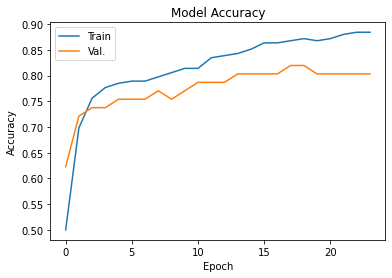

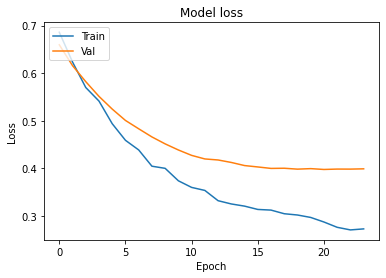

In [144]:
# Plot training & validation accuracy and loss

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Hyperparameter Tuning using GridSearch>. will tune learning rate and batch size in Run 1

In [0]:
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def create_model(learn_rate=0.001, batch_size=0):  #default learning rate for adam optimizer
    # create model

    model = Sequential()

    model.add(Dense(32, input_shape=(13,))) #input layer
    model.add(tensorflow.keras.layers.PReLU()) #PRelu activation, better than ReLu
    #model.add(Dropout(0.2)) 

    model.add(Dense(64)) 
    model.add(tensorflow.keras.layers.PReLU())  #Hidden Layer 1
    #model.add(Dropout(0.2)) 


    model.add(Dense(1, activation='sigmoid')) #binary classification


    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model



In [0]:
# create model
kf_model = KerasClassifier(build_fn=create_model, verbose=1)

In [0]:
# Define the grid search parameters
learn_rate= [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01] 

batch_size = [0, 10, 20, 30]

params = {'learn_rate': [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01] , 'batch_size': [0, 10, 20, 30], 'epochs': [30]}

In [149]:
# Create Grid Search for learning rate


grid = GridSearchCV(estimator=kf_model, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_result = grid.fit(X_train_scaled, y_train)

print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'Mean: {mean}, Stdev: {stdev} with : {param}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   24.5s finished


Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6157
Epoch 2/30
9/9 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7355
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7851
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.8140
Epoch 5/30
9/9 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7975
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8017
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8140
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8182
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8388
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8430
Epoch 11/30
9/9 [======================

In [150]:
print(f"Best accuracy: {grid_result.best_score_} using {grid_result.best_params_}")

Best accuracy: 0.8597789115646257 using {'batch_size': 30, 'epochs': 30, 'learn_rate': 0.001}


In [0]:
pipeline1 = grid_result.best_estimator_

In [152]:
y_pred = pipeline1.predict(X_val_scaled)

3/3 [==============================] - 0s 1ms/step


In [153]:
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_pred)
print("Gridsearch Keras run 1 hypertuning validation accuracy=", val_accuracy)

Gridsearch Keras run 1 hypertuning validation accuracy= 0.7868852459016393


GridSearch Run no.1 : Best val. accuracy = 78.6% using adam optimizer, lr=0.001, batch size=30, epochs =30 

GridSearch Run no. 2 to hypertune optimizer type

In [0]:
def create_model2(optimizer='adam'):  #default learning rate for adam optimizer
    # create model

    model = Sequential()

    model.add(Dense(32, input_shape=(13,))) #input layer
    model.add(tensorflow.keras.layers.PReLU()) #PRelu activation, better than ReLu
    #model.add(Dropout(0.2)) 

    model.add(Dense(64)) 
    model.add(tensorflow.keras.layers.PReLU())  #Hidden Layer 1
    #model.add(Dropout(0.2)) 


    model.add(Dense(1, activation='sigmoid')) #binary classification


    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model



In [0]:
# create model
kf_model2 = KerasClassifier(build_fn=create_model2, verbose=1)

In [0]:
params2 = {'optimizer': ['adam', 'nadam', 'sgd'], 'epochs': [30]}


In [170]:
grid2 = GridSearchCV(estimator=kf_model2, param_grid=params2, n_jobs=-1, verbose=1, scoring='accuracy')
grid_result2 = grid2.fit(X_train_scaled, y_train)

print(f'Best: {grid_result2.best_score_} using {grid_result2.best_params_}')

means = grid_result2.cv_results_['mean_test_score']

stds = grid_result2.cv_results_['std_test_score']

params = grid_result2.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'Mean: {mean}, Stdev: {stdev} with : {param}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.3s finished


Epoch 1/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6116
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7355
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7769
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8058
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8140
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8182
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8388
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8347
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8306
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8512
Epoch 11/30
8/8 [======================

In [171]:
print(f'Best: {grid_result2.best_score_} using {grid_result2.best_params_}')

Best: 0.8514455782312925 using {'epochs': 30, 'optimizer': 'nadam'}


In [0]:
pipeline2 = grid_result2.best_estimator_

In [173]:
y_pred2 = pipeline2.predict(X_val_scaled)

2/2 [==============================] - 0s 1ms/step


In [174]:
from sklearn.metrics import accuracy_score
val_accuracy2 = accuracy_score(y_val, y_pred2)
print("Gridsearch Keras run 2 hypertuning validation accuracy=", val_accuracy2)

Gridsearch Keras run 2 hypertuning validation accuracy= 0.8032786885245902


**Better result using nadam optimizer vs. adam

***Best validation accuracy after hypertuning using GridSearchCV= 80.32%, using nadam optimizer, epochs 30